Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 16s 28ms/step - loss: 0.2941 - val_loss: 0.1455
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 12s 26ms/step - loss: 0.1413 - val_loss: 0.1288
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 24ms/step - loss: 0.1275 - val_loss: 0.1196
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 24ms/step - loss: 0.1193 - val_loss: 0.1145
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 24ms/step - loss: 0.1150 - val_loss: 0.1121
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 23ms/step - loss: 0.1120 - val_loss: 0.1093
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 24ms/step - loss: 0.1098 - val_loss: 0.1074
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 24ms/step - loss: 0.1081 - val_loss: 0.1057
Epoch 9/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 24ms/step - loss: 0.1065 - val_loss: 0.1043
Epoch 10/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 24ms/step - loss: 0.1052 - val_loss: 0.1032
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step


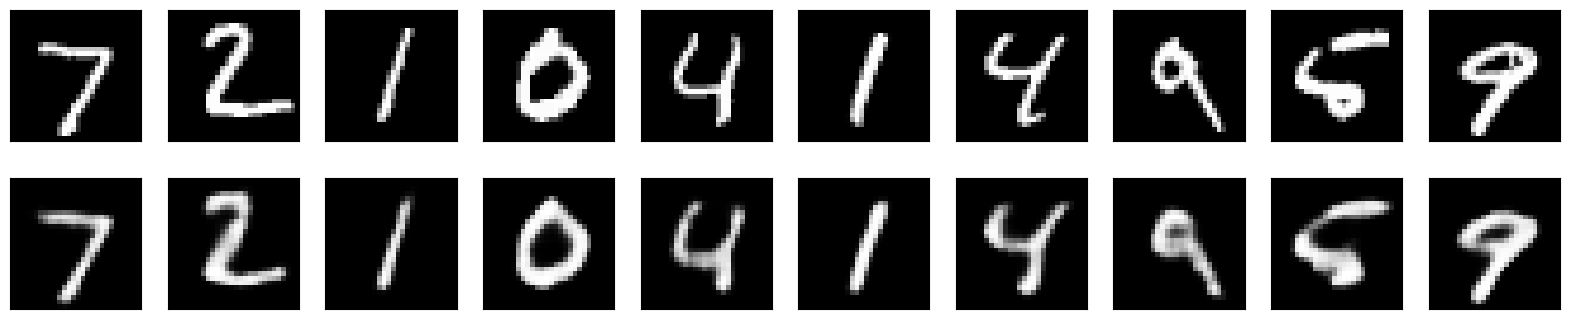

In [1]:
# СОСНЮК КАТЕРИНА ФІТ 4-6 ВАРІАНТ 22 
# Розробити звичайний автокодувальник для датасету MNIST на основі згорткової моделі. 
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D

# Завантаження датасету MNIST
(x_train, _), (x_test, _) = mnist.load_data()

# Нормалізація даних
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))  
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))  

# Створення згорткової автокодувальної моделі
input_img = Input(shape=(28, 28, 1))
x = Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation='relu')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

# Побудова моделі автокодувальника
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Тренування автокодувальника
autoencoder.fit(x_train, x_train, epochs=10, batch_size=128, shuffle=True, validation_data=(x_test, x_test))

# Візуалізація результатів
decoded_imgs = autoencoder.predict(x_test)

plt.figure(figsize=(20, 4))
for i in range(10):
    # Відображення оригінального зображення
    ax = plt.subplot(2, 10, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Відображення відновленого зображення
    ax = plt.subplot(2, 10, i + 1 + 10)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()


In [3]:
# ВИСНОВКИ:
# У реалізованому автокодувальнику всі цифри розпізнані правильно. 
# Це підтверджується шляхом порівняння оригінальних зображень рукописних цифр з MNIST та їх відновлених версій, 
# які були згенеровані автокодувальником після навчання. 
# Усі відтворені зображення відповідають оригінальним без помітних відмінностей або спотворень, що свідчить про успішну роботу моделі відновлення.

# Крім того, за результатами видно, що автокодувальник з згортковими шарами має більше втрати (loss)